<a href="https://colab.research.google.com/github/MuhammadHassan667410/160-Days-of-learning-complete-AI/blob/main/Phase%202%20%3A%20Machine%20Learning%2C(Day%2020%20to%2050)/Dimensionality%20Reduction%20%2B%20Ensemble%20Learning%20%2B%20Imbalanced%20Data(Day%2033%20to%2038)/Handling_Imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=5000, n_features=20, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.9, 0.1], flip_y=0, random_state=42)

print("Original class distribution:")
print(pd.Series(y).value_counts())


Original class distribution:
0    4500
1     500
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


# Baseline Model (Before Handling Imbalance)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
base_model = rfc.fit(x_train, y_train)
y_pred_bm = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
print("Baseline Model:")
print(confusion_matrix(y_test, y_pred_bm))
print(classification_report(y_test, y_pred_bm))
print("ROC AUC:", roc_auc_score(y_test, rfc.predict_proba(x_test)[:,1]))

Baseline Model:
[[900   0]
 [ 43  57]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       900
           1       1.00      0.57      0.73       100

    accuracy                           0.96      1000
   macro avg       0.98      0.78      0.85      1000
weighted avg       0.96      0.96      0.95      1000

ROC AUC: 0.973538888888889


# Apply SMOTE (Oversampling)

In [ ]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [ ]:
x_res, y_res = smote.fit_resample(x_train, y_train)

In [ ]:
print("After SMOTE:")
print(pd.Series(y_res).value_counts())


After SMOTE:
0    3600
1    3600
Name: count, dtype: int64


In [ ]:
smote_model = RandomForestClassifier(random_state=42)
smote_model.fit(x_res, y_res)
y_pred_smt = smote_model.predict(x_test)

In [ ]:
print("SMOTE Model:")
print(confusion_matrix(y_test, y_pred_smt))
print(classification_report(y_test, y_pred_smt))
print("ROC AUC:", roc_auc_score(y_test, smote_model.predict_proba(x_test)[:,1]))

SMOTE Model:
[[889  11]
 [ 21  79]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       900
           1       0.88      0.79      0.83       100

    accuracy                           0.97      1000
   macro avg       0.93      0.89      0.91      1000
weighted avg       0.97      0.97      0.97      1000

ROC AUC: 0.9903277777777778


# Apply Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [ ]:
x_rus, y_rus = rus.fit_resample(x_train, y_train)

In [ ]:
print("After Undersampling:")
print(pd.Series(y_rus).value_counts())


After Undersampling:
0    400
1    400
Name: count, dtype: int64


In [ ]:
model_rus = RandomForestClassifier(random_state=42)
model_rus.fit(x_rus, y_rus)
y_pred_rus = model_rus.predict(x_test)

In [ ]:
print("Undersampling Model:")
print(confusion_matrix(y_test, y_pred_rus))
print(classification_report(y_test, y_pred_rus))
print("ROC AUC:", roc_auc_score(y_test, model_rus.predict_proba(x_test)[:,1]))

Undersampling Model:
[[844  56]
 [  6  94]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       900
           1       0.63      0.94      0.75       100

    accuracy                           0.94      1000
   macro avg       0.81      0.94      0.86      1000
weighted avg       0.96      0.94      0.94      1000

ROC AUC: 0.9790999999999999


# Comparison

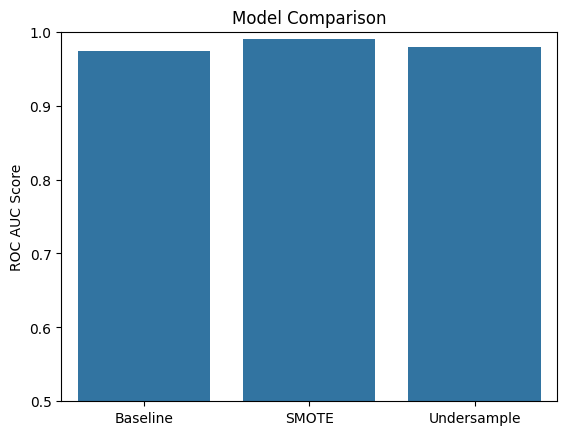

In [ ]:
labels = ['Baseline', 'SMOTE', 'Undersample']
scores = [
    roc_auc_score(y_test, base_model.predict_proba(x_test)[:,1]),
    roc_auc_score(y_test, smote_model.predict_proba(x_test)[:,1]),
    roc_auc_score(y_test, model_rus.predict_proba(x_test)[:,1])
]
import matplotlib.pyplot as plt
sns.barplot(x=labels, y=scores)
plt.ylabel('ROC AUC Score')
plt.title('Model Comparison')
plt.ylim(0.5, 1.0)
plt.show()
